# Description

I am going to analyse data of black friday transactions of a retail store. Dataset is provided by Analytics Vidhya.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [42]:
dataset=pd.read_csv('BlackFriday.csv')

In [176]:
dataset.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


# Data Overview

Dataset has 537577 rows (transactions) and 12 columns (features) as described below:

* User_ID: Unique ID of the user. There are a total of 5891 users in the dataset.
* Product_ID: Unique ID of the product. There are a total of 3623 products in the dataset.
* Gender: indicates the gender of the person making the transaction.
* Age: indicates the age group of the person making the transaction.
* Occupation: shows the occupation of the user, already labeled with numbers 0 to 20.
* City_Category: User's living city category. Cities are categorized into 3 different categories 'A', 'B' and 'C'.
* Stay_In_Current_City_Years: Indicates how long the users has lived in this city.
* Marital_Status: is 0 if the user is not married and 1 otherwise.
* Product_Category_1 to _3: Category of the product. All 3 are already labaled with numbers.
* Purchase: Purchase amount.

In [43]:
dataset.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.375770e+05,537577.00000,537577.000000,537577.000000,370591.000000,164278.000000,537577.000000
mean,1.002992e+06,8.08271,0.408797,5.295546,9.842144,12.669840,9333.859853
std,1.714393e+03,6.52412,0.491612,3.750701,5.087259,4.124341,4981.022133
min,1.000001e+06,0.00000,0.000000,1.000000,2.000000,3.000000,185.000000
25%,1.001495e+06,2.00000,0.000000,1.000000,5.000000,9.000000,5866.000000
50%,1.003031e+06,7.00000,0.000000,5.000000,9.000000,14.000000,8062.000000
75%,1.004417e+06,14.00000,1.000000,8.000000,15.000000,16.000000,12073.000000
max,1.006040e+06,20.00000,1.000000,18.000000,18.000000,18.000000,23961.000000


# DATA CLEANING

In [177]:
missing_value=dataset.isnull().sum().sort_values(ascending=False)
missing_value=missing_value[missing_value>0]/dataset.shape[0]
print(missing_value)

Product_Category_3    0.694410
Product_Category_2    0.310627
dtype: float64


I think the Nan value in Product_Category_3 and Product_Category_2 is mean that customer not buy this item. So, i will replace the nan value with 0.

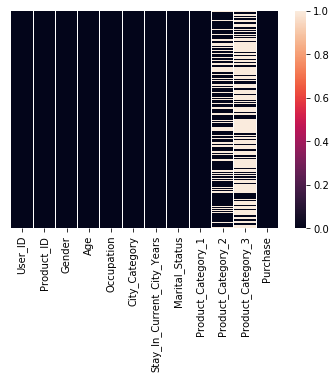

In [178]:
sns.heatmap(dataset.isnull(),cbar=True,yticklabels=False)

In [3]:
dataset=dataset.fillna(0)

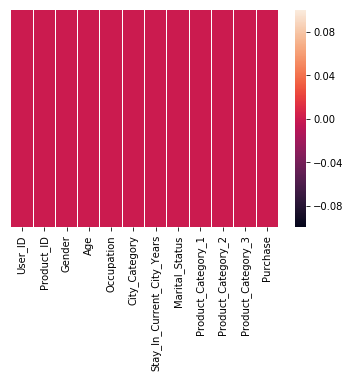

In [180]:
sns.heatmap(dataset.isnull(),cbar=True,yticklabels=False)

In [4]:
dataset=dataset.drop(['User_ID','Product_ID'],axis=1)

Now there is no missing value in dataset

In [192]:
dataset.dtypes

Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

So, the available datatypes are : int64, float64 and objects. We will leave the numeric datatypes alone and focus on object datatypes as the cannot be directly fen into a Machine Learning Model

Let's get Gender first.

In [5]:
#unique values in Gender parameter
gender = np.unique(dataset['Gender'])
gender

array(['F', 'M'], dtype=object)

So, we do not have any 'Other' gender type. I will create a fuction and map M=1 and F=0

In [6]:
def map_gender(gender):
    if gender == 'M':
        return 1
    else:
        return 0
dataset['Gender'] = dataset['Gender'].apply(map_gender)

Let's see in the Age parameter

In [7]:
#unique values in Gender parameter
Age = np.unique(dataset['Age'])
Age

array(['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+'],
      dtype=object)

In [8]:
def map_age(age):
    if age == '0-17':
        return 0
    elif age == '18-25':
        return 1
    elif age == '26-35':
        return 2
    elif age == '36-45':
        return 3
    elif age == '46-50':
        return 4
    elif age == '51-55':
        return 5
    else:
        return 6
dataset['Age'] = dataset['Age'].apply(map_age)

Lets see inside of City_Category.

In [9]:
city_category = np.unique(dataset['City_Category'])
city_category

array(['A', 'B', 'C'], dtype=object)

In [10]:
def map_city_categories(city_category):
    if city_category == 'A':
        return 2
    elif city_category == 'B':
        return 1
    else:
        return 0
dataset['City_Category'] = dataset['City_Category'].apply(map_city_categories)

Let's do the final mapping : Stay_In_Current_City_Years

In [11]:
city_stay = np.unique(dataset['Stay_In_Current_City_Years'])
city_stay

array(['0', '1', '2', '3', '4+'], dtype=object)

In [12]:
def map_stay(stay):
        if stay == '4+':
            return 4
        else:
            return int(stay)
#             current_years = stay
#             current_years = current_years.astype(int)
#             return current_years
dataset['Stay_In_Current_City_Years'] = dataset['Stay_In_Current_City_Years'].apply(map_stay)    

# EDA

C:\Users\daero\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


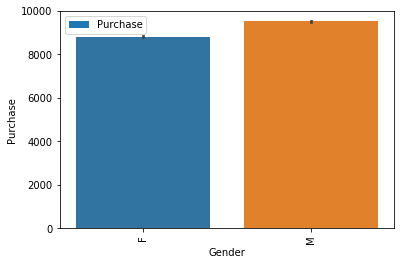

In [183]:
dataset[['Gender','Purchase']].groupby('Gender').mean().plot.bar()
sns.barplot('Gender','Purchase',data=dataset)

It looks like that men tend to spend more on Black Friday although women are not far behind.

Let's see how Age affects the Purchase. Of the top of my head I can say that people of higher age will tend to spen more as they would have more income. Let's see where this gets us.

C:\Users\daero\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<Figure size 720x720 with 0 Axes>

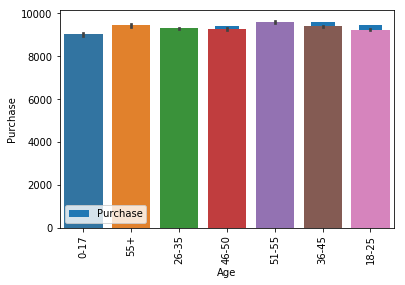

In [163]:
plt.figure(figsize=(10,10))
dataset[['Age','Purchase']].groupby('Age').mean().plot.bar()
sns.barplot('Age','Purchase',data=dataset)

I will also plot some boxplots to study the deviation in Age vs Purchase

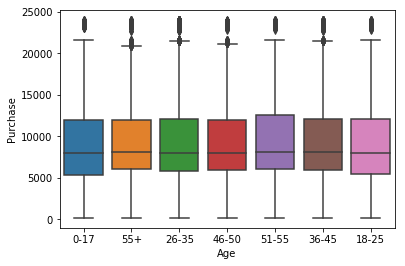

In [164]:
sns.boxplot('Age','Purchase',data=dataset)

Not much of a deciation there. We can say that no matter what age group you belong to, you are gonna make full use of your purchasing power on a Black Friday. Maybe, because everything is so cheap

Lets see how city category affects the purchase.

C:\Users\daero\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


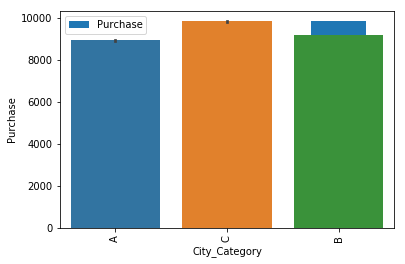

In [167]:
dataset[['City_Category','Purchase']].groupby('City_Category').mean().plot.bar()
sns.barplot('City_Category', 'Purchase', data = dataset)
plt.show()

Okay so, the people belonging to category C tend to spend a little more. These may be the more developed cities that we are talking about here.

Let's now draw a heatmap to clearly see what are the correlations here.

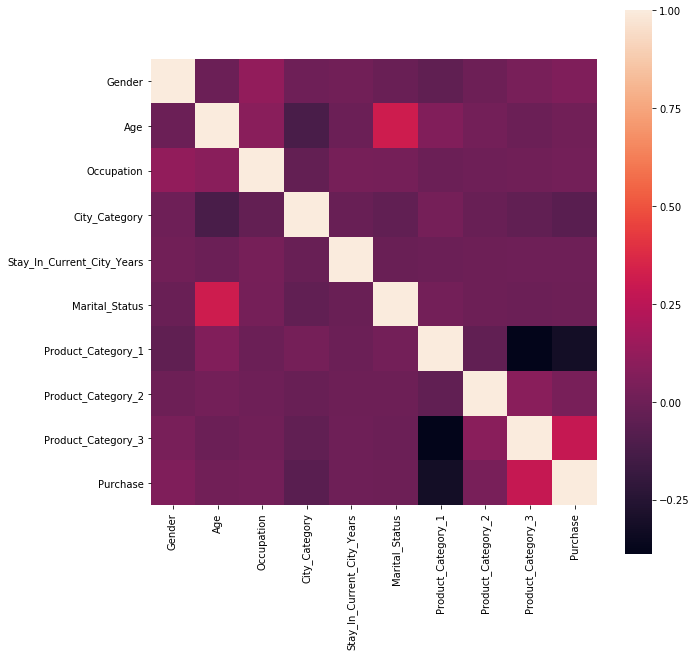

In [205]:
plt.figure(figsize=(10,10))
sns.heatmap(dataset.corr(),square=True)

It can be seen that nothing is highly correlated with the Purchase variable. Although a few conclusions can be drawn:

1. Product_Category_1 has a negative correlation with Purchase.
2. Maritial_Status and Age are strongly correlated. As Expected.
3. Product_Category_3 has a strong correlation with Purchase. Maybe the products in this category were cheap. Let's chrun out some number related to this.

In [213]:
mean_cat_1 = dataset['Product_Category_1'].mean()
mean_cat_2 = dataset['Product_Category_2'].mean()
mean_cat_3= dataset['Product_Category_3'].mean()
print('PC_1 = ',mean_cat_1)
print('PC_2 = ',mean_cat_2)
print('PC_3 = ',mean_cat_3)

PC_1 =  5.295546498455105
PC_2 =  6.784907092379324
PC_3 =  3.871772787898292


In [219]:
dataset.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,0,10,2,2,0,3,0.0,0.0,8370
1,0,0,10,2,2,0,1,6.0,14.0,15200
2,0,0,10,2,2,0,12,0.0,0.0,1422
3,0,0,10,2,2,0,12,14.0,0.0,1057
4,1,6,16,0,4,0,8,0.0,0.0,7969


Well, yes! My intial hypothesis was correct. It can be seen that product category 3 is much lesser in price tham 1 or 2. Hence, is the strong correlation.

# Preprocessing

In [220]:
dataset.keys()

Index(['Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [13]:
keys=['Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status']

In [14]:
for i in keys:
    dataset=pd.get_dummies(dataset,columns=[i])

In [15]:
dataset.keys()

Index(['Product_Category_1', 'Product_Category_2', 'Product_Category_3',
       'Purchase', 'Gender_0', 'Gender_1', 'Age_0', 'Age_1', 'Age_2', 'Age_3',
       'Age_4', 'Age_5', 'Age_6', 'Occupation_0', 'Occupation_1',
       'Occupation_2', 'Occupation_3', 'Occupation_4', 'Occupation_5',
       'Occupation_6', 'Occupation_7', 'Occupation_8', 'Occupation_9',
       'Occupation_10', 'Occupation_11', 'Occupation_12', 'Occupation_13',
       'Occupation_14', 'Occupation_15', 'Occupation_16', 'Occupation_17',
       'Occupation_18', 'Occupation_19', 'Occupation_20', 'City_Category_0',
       'City_Category_1', 'City_Category_2', 'Stay_In_Current_City_Years_0',
       'Stay_In_Current_City_Years_1', 'Stay_In_Current_City_Years_2',
       'Stay_In_Current_City_Years_3', 'Stay_In_Current_City_Years_4',
       'Marital_Status_0', 'Marital_Status_1'],
      dtype='object')

In [16]:
keys=['Gender_0','Age_0','Occupation_0','City_Category_0','Stay_In_Current_City_Years_0','Marital_Status_0']

In [17]:
for i in keys:
    dataset=dataset.drop([i],axis=1)

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [19]:
X=dataset.drop('Purchase',axis=1)

In [20]:
y=dataset['Purchase']

In [21]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [22]:
Sc=StandardScaler()

In [23]:
X_train=Sc.fit_transform(X_train)
X_test=Sc.fit_transform(X_test)

C:\Users\daero\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\daero\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\daero\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\daero\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


# Machine Learning Model

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error,mean_squared_error

# Linear Regression Model

In [28]:
Lr=LinearRegression()

In [239]:
Lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [241]:
predict=Lr.predict(X_test)

In [252]:
print('mean_absolute_error',mean_absolute_error(predict,y_test))
print('mean_squared_error',mean_squared_error(predict,y_test))
print('RMSE Score',(mean_squared_error(predict,y_test)**0.5))

mean_absolute_error 3543.104118358915
mean_squared_error 21429968.810276404
RMSE Score 4629.251430876962


C:\Users\daero\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


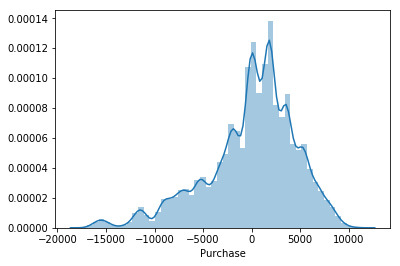

In [253]:
sns.distplot((predict-y_test))

so in this dist plot it seems that this model is not working well because it is not follow a noraml distribution curve

Let's try some other model

# Random Forest

In [35]:
Rf=RandomForestRegressor(n_estimators=30,max_depth=7)

In [36]:
Rf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=7,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [37]:
Rf_predict=Rf.predict(X_test)

In [38]:
print('mean_absolute_error',mean_absolute_error(Rf_predict,y_test))
print('mean_squared_error',mean_squared_error(Rf_predict,y_test))
print('RMSE Score',(mean_squared_error(Rf_predict,y_test)**0.5))

mean_absolute_error 2276.388359161763
mean_squared_error 8972980.395422066
RMSE Score 2995.493347584345


In [31]:
param={'n_estimators': [10, 30, 100, 150],
    'max_depth': [3, 5, 7]}

In [32]:
Gc=GridSearchCV(Rf,param_grid=param,cv=3,n_jobs=-1,scoring='neg_mean_squared_error')

In [33]:
Gc.fit(X_train,y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': [3, 5, 7], 'n_estimators': [10, 30, 100, 300]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [34]:
Gc.best_params_

{'max_depth': 7, 'n_estimators': 30}

C:\Users\daero\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


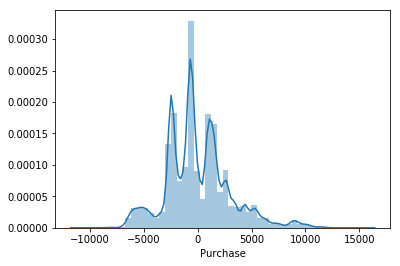

In [39]:
sns.distplot((Rf_predict-y_test))